In [1]:
from config_figures import *

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [3]:
df = pd.read_csv(google_drive_path + '/nmds_pca_data.csv').drop(['system:index', '.geo'], axis=1)
evopca = pd.read_csv('../../evopca_df.csv').rename(columns={'Axis1':'evopca1', 'Axis2':'evopca2', 'Axis3':'evopca3'})
df = df.merge(evopca)
df

,CHELSA_bio12_1981_2010_V2_1,CHELSA_bio15_1981_2010_V2_1,CHELSA_bio1_1981_2010_V2_1,CHELSA_bio4_1981_2010_V2_1,CHELSA_gsl_1981_2010_V2_1,CHELSA_npp_1981_2010_V2_1,MDS1,MDS2,MDS3,SG_Coarse_fragments_005cm,SG_Silt_Content_005cm,SG_Soil_pH_H2O_005cm,x,y,evopca1,evopca2,evopca3
0,36432.962700,210.218000,2978.865000,502.012200,365.000000,25079.295200,0.647776,-0.294345,0.109215,1.709484,22.444225,42.883077,-85.5,0.5,-0.203114,-0.110316,-0.109411
1,35478.439800,194.474800,2980.997700,473.100500,365.000000,25182.618500,0.613397,-0.362359,0.128936,1.209468,23.118284,42.494265,-84.5,0.5,-0.200630,-0.105294,-0.115464
2,35496.315200,173.247700,2980.079300,450.927800,365.000000,25137.881300,0.650375,-0.368078,0.069564,1.495468,22.953371,42.309594,-83.5,0.5,-0.202350,-0.105612,-0.112564
3,35084.596800,177.327300,2982.499900,449.689900,365.000000,25254.789500,0.688352,-0.280964,0.089301,0.661833,23.515853,42.042120,-82.5,0.5,-0.195576,-0.103767,-0.119640
4,32617.759800,183.492400,2984.814600,454.145500,365.000000,25356.537500,0.597050,-0.399280,0.129519,0.530261,25.933236,41.885098,-81.5,0.5,-0.197449,-0.111415,-0.126746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19530,1716.277738,1513.217449,3005.424562,6376.340967,22.944675,3114.175398,0.056760,-0.164505,0.400103,5.890789,27.957657,81.449219,81.5,-31.5,0.126620,0.169220,-0.139234
19531,1537.967800,1515.383700,3004.894100,6327.741600,19.695400,2811.281600,-0.117749,-0.119079,0.269884,3.329121,35.510186,81.519485,82.5,-31.5,0.097319,0.100516,-0.170564
19532,1933.259926,1395.662266,3009.442144,5963.205021,25.543554,3489.118912,-0.419090,1.125502,0.401477,8.571797,19.830088,82.192502,83.5,-31.5,0.130782,0.173807,-0.047381
19533,2393.251600,1432.761000,3005.800100,5760.749000,33.727100,4258.774800,0.668452,1.380589,1.831384,9.597962,18.879776,82.256771,84.5,-31.5,0.082007,0.185947,-0.060640


In [4]:
df_covs = df.drop(['MDS1','MDS2','MDS3','evopca1','evopca2','evopca3','x','y'], axis=1)
df_covs

,CHELSA_bio12_1981_2010_V2_1,CHELSA_bio15_1981_2010_V2_1,CHELSA_bio1_1981_2010_V2_1,CHELSA_bio4_1981_2010_V2_1,CHELSA_gsl_1981_2010_V2_1,CHELSA_npp_1981_2010_V2_1,SG_Coarse_fragments_005cm,SG_Silt_Content_005cm,SG_Soil_pH_H2O_005cm
0,36432.962700,210.218000,2978.865000,502.012200,365.000000,25079.295200,1.709484,22.444225,42.883077
1,35478.439800,194.474800,2980.997700,473.100500,365.000000,25182.618500,1.209468,23.118284,42.494265
2,35496.315200,173.247700,2980.079300,450.927800,365.000000,25137.881300,1.495468,22.953371,42.309594
3,35084.596800,177.327300,2982.499900,449.689900,365.000000,25254.789500,0.661833,23.515853,42.042120
4,32617.759800,183.492400,2984.814600,454.145500,365.000000,25356.537500,0.530261,25.933236,41.885098
...,...,...,...,...,...,...,...,...,...
19530,1716.277738,1513.217449,3005.424562,6376.340967,22.944675,3114.175398,5.890789,27.957657,81.449219
19531,1537.967800,1515.383700,3004.894100,6327.741600,19.695400,2811.281600,3.329121,35.510186,81.519485
19532,1933.259926,1395.662266,3009.442144,5963.205021,25.543554,3489.118912,8.571797,19.830088,82.192502
19533,2393.251600,1432.761000,3005.800100,5760.749000,33.727100,4258.774800,9.597962,18.879776,82.256771


In [5]:
df_st = StandardScaler().fit_transform(df_covs)
pcamodel = PCA(n_components=2)
pca = pd.DataFrame(pcamodel.fit_transform(df_st)).rename(columns = {0:'pc1', 1:'pc2'})
pca

,pc1,pc2
0,4.664520,-1.907655
1,4.636016,-1.943608
2,4.635579,-1.975589
3,4.636653,-1.993013
4,4.491295,-2.005297
...,...,...
19530,-1.082003,3.507856
19531,-1.226192,3.219177
19532,-0.881590,3.720287
19533,-0.767211,3.778025


In [6]:
scaled_pca = pca * (1.0 / (pca.max(axis=0) - pca.min(axis=0)))
scaled_pca

,pc1,pc2
0,0.519329,-0.224109
1,0.516155,-0.228333
2,0.516107,-0.232090
3,0.516226,-0.234137
4,0.500043,-0.235580
...,...,...
19530,-0.120466,0.412099
19531,-0.136519,0.378185
19532,-0.098153,0.437055
19533,-0.085418,0.443838


In [7]:
pca_variance_explained = pd.Series(pcamodel.explained_variance_ratio_, index=['pc1','pc2'])
pca_variance_explained

pc1    0.438662
pc2    0.265299
dtype: float64

In [26]:
pca_loadings = pd.DataFrame(pcamodel.components_.T, index = df_covs.columns, columns=['pc1','pc2'])
pca_loadings['var_name'] = ['Annual P', 'P season', 'MAT', 'T season', 'GSL', 'NPP', 'CF', 'Silt', 'pH']
pca_loadings

,pc1,pc2,var_name
CHELSA_bio12_1981_2010_V2_1,0.396485,-0.255254,Annual P
CHELSA_bio15_1981_2010_V2_1,-0.015762,0.472781,P season
CHELSA_bio1_1981_2010_V2_1,0.389413,0.360790,MAT
CHELSA_bio4_1981_2010_V2_1,-0.437969,-0.244097,T season
CHELSA_gsl_1981_2010_V2_1,0.431547,-0.219677,GSL
CHELSA_npp_1981_2010_V2_1,0.481241,-0.116788,NPP
SG_Coarse_fragments_005cm,-0.094442,0.053298,CF
SG_Silt_Content_005cm,-0.215826,-0.453108,Silt
SG_Soil_pH_H2O_005cm,-0.160516,0.501523,pH


In [27]:
# reproject MDS values from [10%-90% quantiles] to [0,1] for RGB color
def scale_10_90(vec):
    q = vec.quantile([0.1, 0.9])
    return vec.apply(lambda x: min(max((x-q[0.1])/(q[0.9]-q[0.1]), 0), 1))

pca_df = scaled_pca.join(df[['MDS1','MDS2','MDS3','evopca1','evopca2','evopca3','x','y']])

pca_df['MDS1_sc'] = scale_10_90(df['MDS1']) 
pca_df['MDS2_sc'] = scale_10_90(df['MDS2']) 
pca_df['MDS3_sc'] = scale_10_90(df['MDS3']) 

pca_df['evopca1_sc'] = scale_10_90(df['evopca1']) 
pca_df['evopca2_sc'] = scale_10_90(df['evopca2']) 
pca_df['evopca3_sc'] = scale_10_90(df['evopca3']) 

pca_df

,pc1,pc2,MDS1,MDS2,MDS3,evopca1,evopca2,evopca3,x,y,MDS1_sc,MDS2_sc,MDS3_sc,evopca1_sc,evopca2_sc,evopca3_sc
0,0.519329,-0.224109,0.647776,-0.294345,0.109215,-0.203114,-0.110316,-0.109411,-85.5,0.5,1.000000,0.000000,0.672169,0.000000,0.065651,0.568248
1,0.516155,-0.228333,0.613397,-0.362359,0.128936,-0.200630,-0.105294,-0.115464,-84.5,0.5,1.000000,0.000000,0.707371,0.000000,0.079729,0.552604
2,0.516107,-0.232090,0.650375,-0.368078,0.069564,-0.202350,-0.105612,-0.112564,-83.5,0.5,1.000000,0.000000,0.601389,0.000000,0.078836,0.560098
3,0.516226,-0.234137,0.688352,-0.280964,0.089301,-0.195576,-0.103767,-0.119640,-82.5,0.5,1.000000,0.022467,0.636620,0.000000,0.084007,0.541811
4,0.500043,-0.235580,0.597050,-0.399280,0.129519,-0.197449,-0.111415,-0.126746,-81.5,0.5,1.000000,0.000000,0.708413,0.000000,0.062570,0.523447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19530,-0.120466,0.412099,0.056760,-0.164505,0.400103,0.126620,0.169220,-0.139234,81.5,-31.5,0.522254,0.223336,1.000000,0.291173,0.849180,0.491171
19531,-0.136519,0.378185,-0.117749,-0.119079,0.269884,0.097319,0.100516,-0.170564,82.5,-31.5,0.348682,0.301687,0.958975,0.244566,0.656606,0.410202
19532,-0.098153,0.437055,-0.419090,1.125502,0.401477,0.130782,0.173807,-0.047381,83.5,-31.5,0.048961,1.000000,1.000000,0.297793,0.862036,0.728558
19533,-0.085418,0.443838,0.668452,1.380589,1.831384,0.082007,0.185947,-0.060640,84.5,-31.5,1.000000,1.000000,1.000000,0.220211,0.896065,0.694292


In [110]:
C_nmds = np.array(pca_df[['MDS1_sc','MDS2_sc','MDS3_sc']])
print(C_nmds)

C_evopca = np.array(pca_df[['evopca2_sc','evopca1_sc','evopca3_sc']])
print(C_evopca)

[[1.         0.         0.67216865]
 [1.         0.         0.70737148]
 [1.         0.         0.60138891]
 ...
 [0.04896074 1.         1.        ]
 [1.         1.         1.        ]
 [0.         0.         1.        ]]
[[0.06565051 0.         0.56824843]
 [0.07972856 0.         0.55260378]
 [0.07883636 0.         0.56009799]
 ...
 [0.86203638 0.29779317 0.72855791]
 [0.89606512 0.2202108  0.69429225]
 [0.89606512 0.2202108  0.69429225]]


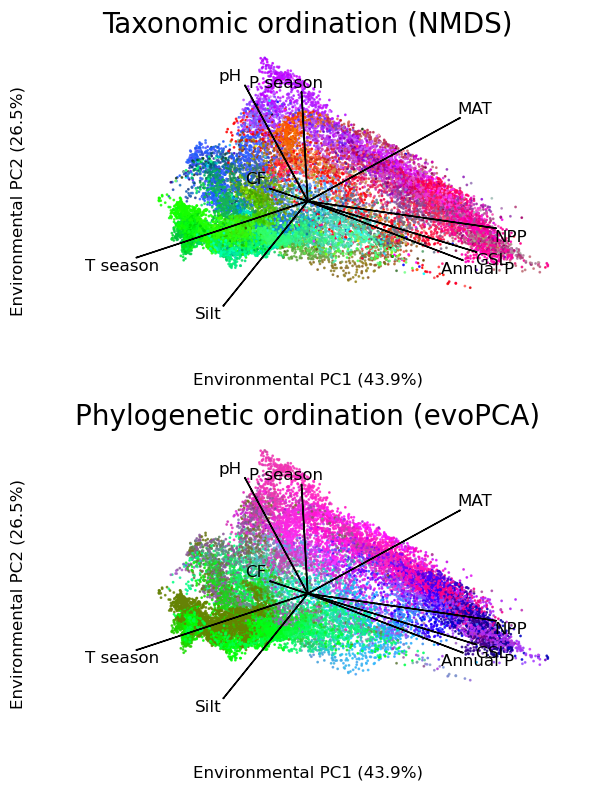

In [124]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,8))

ax1.scatter(x=pca_df['pc1'], y=pca_df['pc2'], c=C_nmds, s=1, alpha=0.8)
ax1.set_title('Taxonomic ordination (NMDS)', fontsize=20)
ax2.scatter(x=pca_df['pc1'], y=pca_df['pc2'], c=C_evopca, s=1, alpha=0.8)
ax2.set_title('Phylogenetic ordination (evoPCA)', fontsize=20)

for ax in [ax1, ax2]:
    ax.set_xlabel("Environmental PC1 (" + str(pca_variance_explained.pc1.round(3) * 100) + "%)", fontsize=12)
    ax.set_ylabel( "Environmental PC2 (" + str(pca_variance_explained.pc2.round(3) * 100) + "%)", fontsize=12)
    for r in pca_loadings.iterrows():
        ax.arrow(0, 0, r[1]['pc1'], r[1]['pc2'], color = 'k')
        text_x = r[1]['pc1'] + 0.04 if r[1]['pc1'] >= 0 else r[1]['pc1'] - 0.04
        text_y = r[1]['pc2'] + 0.04 if r[1]['pc2'] >= 0 else r[1]['pc2'] - 0.04
        ax.text(text_x, text_y, r[1]['var_name'], color = 'k', ha = 'center', va = 'center', fontsize=12)
    ax.set(xlim = (-0.7, 0.7), ylim = (-0.7, 0.7), xticklabels=[], xticks=[], yticklabels=[], yticks=[])
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../figures/nmds_evopca_pca.png')

In [70]:
C_evopca = np.array(pca_df[['evopca2_sc','evopca1_sc','evopca3_sc']])
C_evopca

array([[0.06565051, 0.        , 0.56824843],
       [0.07972856, 0.        , 0.55260378],
       [0.07883636, 0.        , 0.56009799],
       ...,
       [0.86203638, 0.29779317, 0.72855791],
       [0.89606512, 0.2202108 , 0.69429225],
       [0.89606512, 0.2202108 , 0.69429225]])

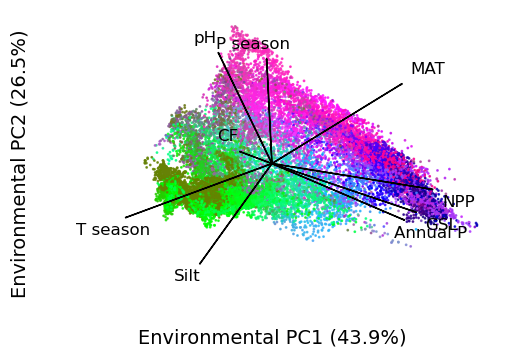

In [107]:
fig = plt.figure(figsize=(6,4))

ax1 = fig.add_subplot(111)
s = ax1.scatter(x=pca_df['pc1'], y=pca_df['pc2'], c=C_evopca, s=1, alpha=0.8)
ax1.set_xlabel("Environmental PC1 (" + str(pca_variance_explained.pc1.round(3) * 100) + "%)", fontsize=14)
ax1.set_ylabel("Environmental PC2 (" + str(pca_variance_explained.pc2.round(3) * 100) + "%)", fontsize=14)
for r in pca_loadings.iterrows():
    ax1.arrow(0, 0, r[1]['pc1'], r[1]['pc2'], color = 'k')
    # ax1.text(r[1]['pc1'] * 1.15, r[1]['pc2'] * 1.15, r[1]['var_name'], color = 'k', ha = 'center', va = 'center')
    text_x = r[1]['pc1'] + 0.08 if r[1]['pc1'] >= 0 else r[1]['pc1'] - 0.04
    text_y = r[1]['pc2'] + 0.07 if r[1]['pc2'] >= 0 else r[1]['pc2'] - 0.06
    ax1.text(text_x, text_y, r[1]['var_name'], color = 'k', ha = 'center', va = 'center', fontsize=12)
ax1.set(xlim = (-0.7, 0.7), ylim = (-0.7, 0.7), xticklabels=[], xticks=[], yticklabels=[], yticks=[])
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

plt.savefig('../figures/evopca_pca.png')

# plots for redundancy analysis in R

In [18]:
rda_evopca_sites = pd.read_csv('../../rda_evopca_sites.csv')
rda_evopca_species = pd.read_csv('../../rda_evopca_species.csv')
rda_evopca_env = pd.read_csv('../../rda_evopca_env.csv')

rda_evopca_sites

,x,y,Axis1,Axis2,Axis3,RDA1,RDA2
0,-81.5,-69.5,0.269721,0.005624,-0.330071,-0.061449,0.039226
1,-78.5,-69.5,0.233120,0.055354,-0.115129,0.014837,0.013027
2,-75.5,-69.5,0.263979,0.008763,-0.319436,-0.056888,0.037975
3,-80.5,-68.5,0.263979,0.008763,-0.319436,-0.056888,0.037975
4,-75.5,-68.5,0.263979,0.008763,-0.319436,-0.056888,0.037975
...,...,...,...,...,...,...,...
19530,-51.5,20.5,-0.144467,-0.044131,0.096978,0.105670,-0.095595
19531,-50.5,20.5,-0.146510,-0.011914,0.093910,0.113352,-0.081618
19532,-49.5,20.5,-0.150962,-0.073742,0.105688,0.101503,-0.110175
19533,-48.5,20.5,-0.142800,-0.051293,0.097809,0.103812,-0.098659


In [21]:
# reproject MDS values from [10%-90% quantiles] to [0,1] for RGB color
def scale_10_90(vec):
    q = vec.quantile([0.1, 0.9])
    return vec.apply(lambda x: min(max((x-q[0.1])/(q[0.9]-q[0.1]), 0), 1))

rda_evopca_sites['Axis1_sc'] = scale_10_90(rda_evopca_sites['Axis1']) 
rda_evopca_sites['Axis2_sc'] = scale_10_90(rda_evopca_sites['Axis2']) 
rda_evopca_sites['Axis3_sc'] = scale_10_90(rda_evopca_sites['Axis3']) 
rda_evopca_sites

,x,y,Axis1,Axis2,Axis3,RDA1,RDA2,Axis1_sc,Axis2_sc,Axis3_sc
0,-81.5,-69.5,0.269721,0.005624,-0.330071,-0.061449,0.039226,0.518791,0.390625,0.000000
1,-78.5,-69.5,0.233120,0.055354,-0.115129,0.014837,0.013027,0.460573,0.530018,0.553469
2,-75.5,-69.5,0.263979,0.008763,-0.319436,-0.056888,0.037975,0.509657,0.399424,0.025454
3,-80.5,-68.5,0.263979,0.008763,-0.319436,-0.056888,0.037975,0.509657,0.399424,0.025454
4,-75.5,-68.5,0.263979,0.008763,-0.319436,-0.056888,0.037975,0.509657,0.399424,0.025454
...,...,...,...,...,...,...,...,...,...,...
19530,-51.5,20.5,-0.144467,-0.044131,0.096978,0.105670,-0.095595,0.000000,0.251166,1.000000
19531,-50.5,20.5,-0.146510,-0.011914,0.093910,0.113352,-0.081618,0.000000,0.341468,1.000000
19532,-49.5,20.5,-0.150962,-0.073742,0.105688,0.101503,-0.110175,0.000000,0.168167,1.000000
19533,-48.5,20.5,-0.142800,-0.051293,0.097809,0.103812,-0.098659,0.000000,0.231089,1.000000


In [22]:
C_evopca = np.array(rda_evopca_sites[['Axis1_sc','Axis2_sc','Axis3_sc']])
C_evopca

array([[0.51879072, 0.39062538, 0.        ],
       [0.46057253, 0.53001834, 0.55346904],
       [0.50965669, 0.39942387, 0.02545382],
       ...,
       [0.        , 0.16816732, 1.        ],
       [0.        , 0.23108915, 1.        ],
       [0.        , 0.21455841, 1.        ]])

In [39]:
rda_evopca_species['species_name'] = ['evoPCA1','evoPCA2','evoPCA3']
rda_evopca_species['RDA1_sc'] = rda_evopca_species['RDA1'] / 50
rda_evopca_species['RDA2_sc'] = rda_evopca_species['RDA2'] / 50
rda_evopca_species

,RDA1,RDA2,species_name,RDA1_sc,RDA2_sc
0,-9.144963,3.549025,evoPCA1,-0.182899,0.070981
1,8.006527,13.158740,evoPCA2,0.160131,0.263175
2,9.713068,-7.505363,evoPCA3,0.194261,-0.150107


In [40]:
rda_evopca_env['var_name'] = ['MAT', 'T_season', 'P_season', 'annual_P']
rda_evopca_env['RDA1_sc'] = rda_evopca_env['RDA1'] / 2
rda_evopca_env['RDA2_sc'] = rda_evopca_env['RDA2'] / 2
rda_evopca_env

,RDA1,RDA2,var_name,RDA1_sc,RDA2_sc
0,0.717304,-0.017994,MAT,0.358652,-0.008997
1,-0.666750,0.050881,T_season,-0.333375,0.025440
2,0.290596,0.119341,P_season,0.145298,0.059670
3,0.216067,-0.165780,annual_P,0.108034,-0.082890


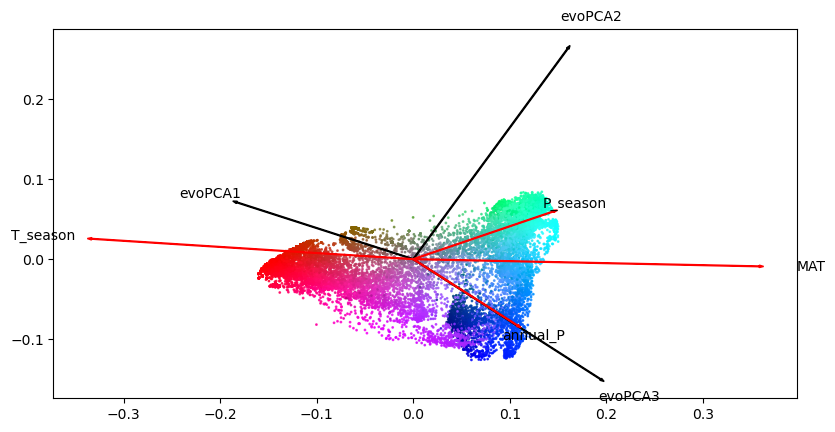

In [41]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(111)
ax1.scatter(x=rda_evopca_sites['RDA1'], y=rda_evopca_sites['RDA2'], c=C_evopca, s=1, alpha=0.8)

for r in rda_evopca_species.iterrows():
    ax1.arrow(0, 0, r[1]['RDA1_sc'], r[1]['RDA2_sc'], color = 'k')
    ax1.text(r[1]['RDA1_sc'] * 1.15, r[1]['RDA2_sc'] * 1.15, r[1]['species_name'], color = 'k', ha = 'center', va = 'center')

for r in rda_evopca_env.iterrows():
    ax1.arrow(0, 0, r[1]['RDA1_sc'], r[1]['RDA2_sc'], color = 'r')
    ax1.text(r[1]['RDA1_sc'] * 1.15, r[1]['RDA2_sc'] * 1.15, r[1]['var_name'], color = 'k', ha = 'center', va = 'center')

plt.show()

In [42]:
rda_nmds_sites = pd.read_csv('../../rda_nmds_sites.csv')
rda_nmds_species = pd.read_csv('../../rda_nmds_species.csv')
rda_nmds_env = pd.read_csv('../../rda_nmds_env.csv')

In [44]:
rda_nmds_sites

,x,y,MDS1,MDS2,MDS3,RDA1,RDA2
0,-81.5,-69.5,-0.293404,0.082063,-0.379634,-0.048103,0.030292
1,-78.5,-69.5,0.041158,0.291515,0.012155,-0.014363,0.008411
2,-75.5,-69.5,-0.074009,0.416517,-0.129807,-0.038496,0.021911
3,-80.5,-68.5,-0.062095,0.406341,-0.121037,-0.036534,0.021269
4,-75.5,-68.5,-0.253546,0.420540,0.045200,-0.039940,-0.007799
...,...,...,...,...,...,...,...
19530,-51.5,20.5,0.557341,-0.200561,-0.011472,0.048859,0.025900
19531,-50.5,20.5,0.502533,-0.187551,-0.026265,0.043482,0.025016
19532,-49.5,20.5,0.549492,-0.217127,-0.020867,0.048769,0.026132
19533,-48.5,20.5,0.492699,-0.225839,-0.038973,0.044386,0.024958


In [50]:
# reproject MDS values from [10%-90% quantiles] to [0,1] for RGB color
def scale_10_90(vec):
    q = vec.quantile([0.1, 0.9])
    return vec.apply(lambda x: min(max((x-q[0.1])/(q[0.9]-q[0.1]), 0), 1))

rda_nmds_sites['MDS1_sc'] = scale_10_90(rda_nmds_sites['MDS1']) 
rda_nmds_sites['MDS2_sc'] = scale_10_90(rda_nmds_sites['MDS2']) 
rda_nmds_sites['MDS3_sc'] = scale_10_90(rda_nmds_sites['MDS3']) 
rda_nmds_sites

,x,y,MDS1,MDS2,MDS3,RDA1,RDA2,MDS1_sc,MDS2_sc,MDS3_sc
0,-81.5,-69.5,-0.293404,0.082063,-0.379634,-0.048103,0.030292,0.173972,0.648616,0.000000
1,-78.5,-69.5,0.041158,0.291515,0.012155,-0.014363,0.008411,0.506735,1.000000,0.498910
2,-75.5,-69.5,-0.074009,0.416517,-0.129807,-0.038496,0.021911,0.392187,1.000000,0.245497
3,-80.5,-68.5,-0.062095,0.406341,-0.121037,-0.036534,0.021269,0.404037,1.000000,0.261152
4,-75.5,-68.5,-0.253546,0.420540,0.045200,-0.039940,-0.007799,0.213615,1.000000,0.557897
...,...,...,...,...,...,...,...,...,...,...
19530,-51.5,20.5,0.557341,-0.200561,-0.011472,0.048859,0.025900,1.000000,0.161146,0.456733
19531,-50.5,20.5,0.502533,-0.187551,-0.026265,0.043482,0.025016,0.965630,0.183585,0.430327
19532,-49.5,20.5,0.549492,-0.217127,-0.020867,0.048769,0.026132,1.000000,0.132573,0.439963
19533,-48.5,20.5,0.492699,-0.225839,-0.038973,0.044386,0.024958,0.955849,0.117547,0.407643


In [51]:
C_nmds = np.array(rda_nmds_sites[['MDS1_sc','MDS2_sc','MDS3_sc']])
C_nmds

array([[0.17397175, 0.64861573, 0.        ],
       [0.50673535, 1.        , 0.49891013],
       [0.39218748, 1.        , 0.24549738],
       ...,
       [1.        , 0.13257329, 0.43996291],
       [0.95584892, 0.1175474 , 0.407643  ],
       [0.96798968, 0.08422274, 0.45100795]])

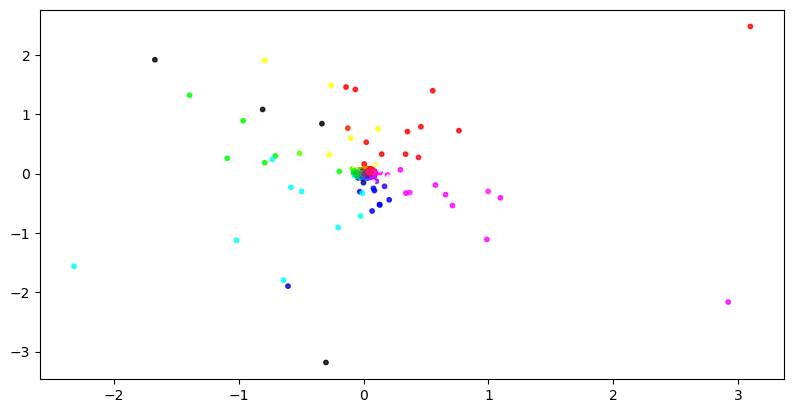

In [53]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(111)
ax1.scatter(x=rda_nmds_sites['RDA1'], y=rda_nmds_sites['RDA2'], c=C_nmds, s=10, alpha=0.8)

# for r in rda_evopca_species.iterrows():
#     ax1.arrow(0, 0, r[1]['RDA1_sc'], r[1]['RDA2_sc'], color = 'k')
#     ax1.text(r[1]['RDA1_sc'] * 1.15, r[1]['RDA2_sc'] * 1.15, r[1]['species_name'], color = 'k', ha = 'center', va = 'center')

# for r in rda_evopca_env.iterrows():
#     ax1.arrow(0, 0, r[1]['RDA1_sc'], r[1]['RDA2_sc'], color = 'r')
#     ax1.text(r[1]['RDA1_sc'] * 1.15, r[1]['RDA2_sc'] * 1.15, r[1]['var_name'], color = 'k', ha = 'center', va = 'center')

plt.show()